## 全连接神经网络

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
Boston = datasets.load_boston()

X = Boston.data
y = Boston.target

### 分析数据：1、shape，dytype

In [5]:
print('the shape of X is : ', X.shape)
print('the shape of y is : ', y.shape)
print('-----------------------------')
print('the type of X is: ', X.dtype)
print('the type of y is: ', y.dtype)

the shape of X is :  (506, 13)
the shape of y is :  (506,)
-----------------------------
the type of X is:  float64
the type of y is:  float64


### 2. 画一下 y 的分布

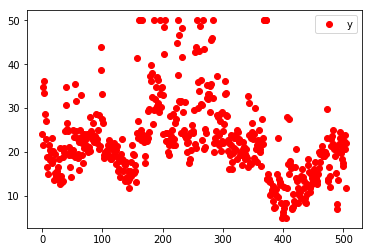

In [6]:
plt.plot(range(len(y)), y, 'ro', label="y")
plt.legend()
plt.show()

### 特征与y的关系（统计学分析）

In [7]:
x1 = X[:,:1]
x1.shape

(506, 1)

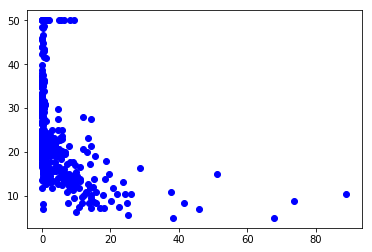

In [10]:
plt.plot(x1, y, 'bo')

## split training set and testing set 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## 标准化

In [12]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

standard.fit(X_train, y_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

## 设定超参数

In [13]:
input_size = 13 # 输入的特征数
hidden_size = 32 # 隐藏层 神经元个数
ouput_size = 1 # 输出值

Epoch = 1000
learning_rate = 0.01 # 学习率

## 最激动人心的  搭建模型

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.hidden1 = nn.Linear(13, 64) # [-1, 13] * [13, 64] ==> [-1, 64]
        self.hidden2 = nn.Linear(64, 32) # [-1, 64] * [64, 32] ==> [-1, 32]
        self.hidden3 = nn.Linear(32, 10) # [-1, 32] * [32, 10] ==> [-1, 10]
        self.predict = nn.Linear(10, 1)  # [-1, 10] * [10, 1] ==> [-1, 1]
        
    def forward(self, x):
        # 真正开始搭建网络的地方，前向传播
        x = F.relu(self.hidden1(x)) # x = [-1, 13] ==> relu([-1, 64])
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        out = self.predict(x) # [-1, 1]
        
        return out
        

In [15]:
net = Net()
net

Net(
  (hidden1): Linear(in_features=13, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (hidden3): Linear(in_features=32, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)